In [1]:
import numpy as np
from imantics import Polygons, Mask

# This can be any array
array = np.ones((100, 100))

polygons = Mask(array).polygons()

print(polygons.points)
print(polygons.segmentation)

[array([[ 0,  0],
       [ 0, 99],
       [99, 99],
       [99,  0]])]
[[0, 0, 0, 99, 99, 99, 99, 0]]


In [2]:
import os
import sys

import numpy as np

# Root directory of the project
from PIL import Image

ROOT_DIR = os.path.abspath(".")

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import skimage.io

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

import samples.coco.coco as coco
import samples.police2.backlash as backlash


class MaskRCNNModel():
    MODEL_FILE_NAME = "mask_rcnn_coco.h5"
    CLASSES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

    CONFIG_CLASS = coco.CocoConfig

    def __init__(self):
        # Local path to trained weights file
        COCO_MODEL_PATH = os.path.join(ROOT_DIR, self.MODEL_FILE_NAME)

        # Download COCO trained weights from Releases if needed
        if not os.path.exists(COCO_MODEL_PATH):
            utils.download_trained_weights(COCO_MODEL_PATH)

        class InferenceConfig(self.CONFIG_CLASS):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
            NUM_CLASSES = len(self.CLASSES)  # COCO has 80 classes

        self.config = InferenceConfig()
        #         config.display()

        # Create model object in inference mode.
        model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=self.config)

        # Load weights
        model.load_weights(COCO_MODEL_PATH, by_name=True)

        # COCO Class names
        # Index of the class in the list is its ID. For example, to get ID of
        # the teddy bear class, use: class_names.index('teddy bear')
        class_names = self.CLASSES

        self.model = model

model_full = MaskRCNNModel()


/Users/skabbit/opt/anaconda3/envs/backlash/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/skabbit/opt/anaconda3/envs/backlash/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/skabbit/opt/anaconda3/envs/backlash/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/skabbit/opt/ana






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
image = skimage.io.imread("images/no-cops-test.jpg")
results = model_full.model.detect([image], verbose=1)

In [7]:
results[0]['masks'][:,:,0].shape

(2787, 3716)

In [49]:
results[0]['class_ids']

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 26,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 34,  1,  1,  1,  1,  1,  1,
        1], dtype=int32)

In [50]:
masks = results[0]['masks'][:,:,results[0]['class_ids'] == 1]

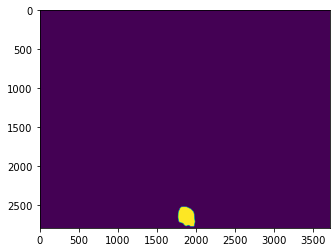

In [46]:
import matplotlib.pyplot as plt

plt.imshow(masks[:,:,6].astype(np.uint8))

In [11]:
polygons = Mask(results[0]['masks'][:,:,0]).polygons()

print(polygons.points)
# print(polygons.segmentation)


[array([[1037, 2351],
       [1036, 2352],
       [1031, 2352],
       ...,
       [1053, 2352],
       [1047, 2352],
       [1046, 2351]])]


In [12]:
dir(polygons)

['INSTANCE_TYPES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_c_bbox',
 '_c_mask',
 '_c_points',
 '_c_segmentation',
 'bbox',
 'create',
 'draw',
 'from_bbox',
 'from_mask',
 'mask',
 'points',
 'polygons',
 'segmentation',
 'simplify']

In [55]:
for i in range(5):
    print(len(polygons.points[0]))
    print(polygons.simplify())
    

625
None
625
None
625
None
625
None
625
None


In [28]:
shape_attributes = {                        
    "all_points_x": [],
    "all_points_y": []
}
for point in polygons.points[0]:
    shape_attributes['all_points_x'].append(int(point[0]))
    shape_attributes['all_points_y'].append(int(point[1]))

In [59]:
os.path.split("/Users/skabbit/Downloads/backlash-video-good")[1]

'backlash-video-good'

In [29]:
import json
json.dumps(shape_attributes)

'{"all_points_x": [1037, 1036, 1031, 1030, 1025, 1024, 1023, 1021, 1020, 1019, 1018, 1017, 1016, 1015, 1013, 1012, 1010, 1009, 1007, 1006, 1002, 1001, 997, 996, 992, 991, 987, 986, 985, 984, 982, 981, 980, 979, 978, 977, 976, 975, 974, 972, 971, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 958, 957, 956, 955, 954, 953, 952, 941, 940, 938, 937, 935, 934, 931, 930, 927, 927, 926, 926, 925, 925, 924, 924, 923, 923, 922, 922, 921, 921, 920, 920, 919, 919, 918, 918, 916, 916, 915, 915, 914, 914, 913, 913, 912, 912, 911, 911, 912, 912, 913, 913, 914, 914, 915, 915, 916, 916, 917, 917, 918, 918, 919, 919, 920, 920, 921, 921, 922, 922, 923, 923, 924, 924, 925, 925, 926, 926, 927, 927, 928, 928, 929, 929, 930, 930, 931, 931, 932, 932, 934, 934, 933, 933, 932, 932, 931, 931, 930, 930, 929, 929, 928, 928, 921, 920, 918, 917, 916, 915, 914, 912, 911, 910, 909, 908, 907, 906, 905, 904, 903, 902, 901, 900, 898, 897, 895, 894, 893, 892, 890, 889, 888, 887, 886, 885, 883, 882, 881, 880, 879,